In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [4]:
# Load the dataset
data = pd.read_csv('/content/drugs_side_effects_drugs_com.csv')

In [5]:
data.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,X,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,760.0,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,X,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,449.0,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,NaN,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,482.0,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",NaN,41%,Rx,X,N,X,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,623.0,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,NaN,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      2931 non-null   object 
 1   medical_condition              2931 non-null   object 
 2   side_effects                   2807 non-null   object 
 3   generic_name                   2888 non-null   object 
 4   drug_classes                   2849 non-null   object 
 5   brand_names                    1718 non-null   object 
 6   activity                       2931 non-null   object 
 7   rx_otc                         2930 non-null   object 
 8   pregnancy_category             2702 non-null   object 
 9   csa                            2931 non-null   object 
 10  alcohol                        1377 non-null   object 
 11  related_drugs                  1462 non-null   object 
 12  medical_condition_description  2931 non-null   o

In [7]:
data.describe(include='all')

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
count,2931,2931,2807,2888,2849,1718,2931,2930,2702,2931,1377,1462,2931,1586.000000,1586.000000,2931,2931
unique,2912,47,2759,1392,274,1552,93,3,6,7,1,535,47,NaN,NaN,2931,47
top,triamcinolone,Pain,hives ; difficult breathing; swelling of your ...,diphenhydramine,Upper respiratory combinations,"Acne-Clear, Benzac AC, BenzePrO, Benziq, Brevo...",0%,Rx,C,N,X,doxycycline: https://www.drugs.com/doxycycline...,Pain An unpleasant sensory and emotional exper...,NaN,NaN,https://www.drugs.com/mtm/setmelanotide.html,https://www.drugs.com/condition/pain.html
freq,3,264,10,17,245,10,895,1998,1382,2688,1377,41,264,NaN,NaN,1,264
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.812926,75.064943,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.313044,184.900847,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.600000,2.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,12.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.500000,58.000000,NaN,NaN


In [8]:
data.shape

(2931, 17)

In [9]:
# Data Cleaning
data['side_effects'] = data['side_effects'].fillna('Unknown')
data['related_drugs'] = data['related_drugs'].fillna('Unknown')
data['rating'] = data['rating'].fillna(0)
data['no_of_reviews'] = data['no_of_reviews'].fillna(0)

data['alcohol'] = data['alcohol'].fillna(0)
data['alcohol'] = data['alcohol'].replace({'X':1})

data['rx_otc'] = data['rx_otc'].fillna('Unknown')
data['pregnancy_category'] = data['pregnancy_category'].fillna('Unknown')
data['drug_classes'] = data['drug_classes'].fillna('Unknown')

/tmp/ipython-input-3817567757.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['alcohol'] = data['alcohol'].replace({'X':1})


In [10]:
# Feature Engineering
# Risk Score
data['risk_score'] = (
    data['alcohol'] +
    data['pregnancy_category'].isin(['D','X']).astype(int) +
    data['csa'].isin(['1','2']).astype(int)
)

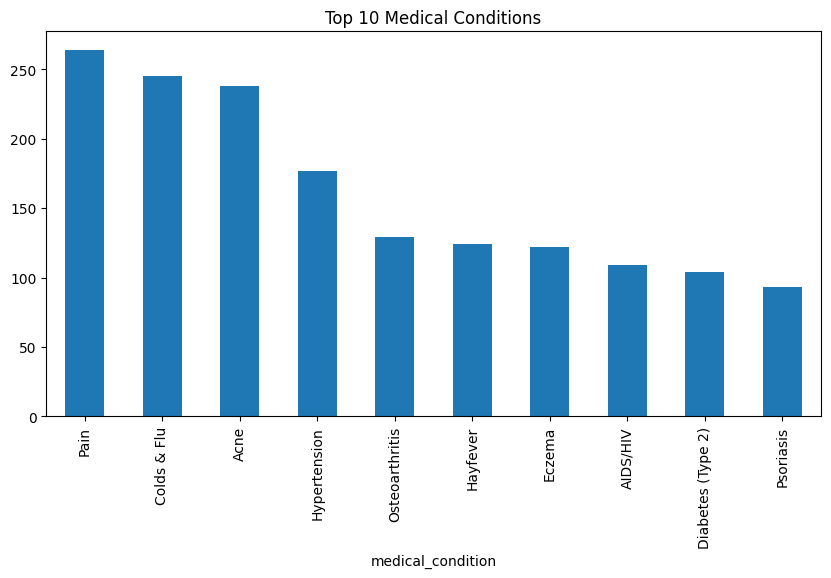

In [11]:
# Exploratory Data Analysis
# Top Medical Conditions
plt.figure(figsize=(10,5))
data['medical_condition'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Medical Conditions")
plt.show()

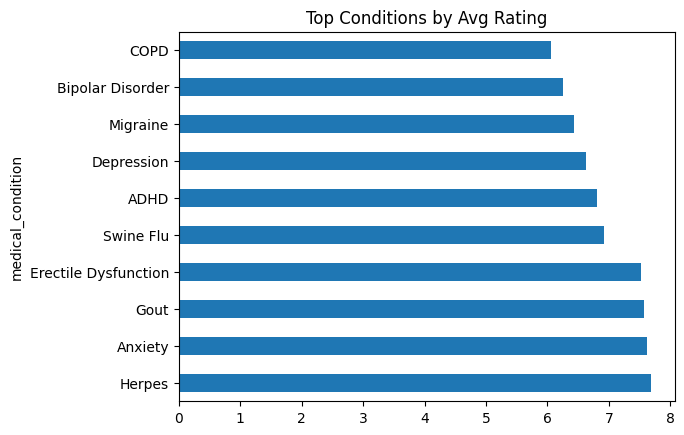

In [13]:
# Average Rating by Condition
avg_rating = data.groupby('medical_condition')['rating'].mean().sort_values(ascending=False).head(10)
avg_rating.plot(kind='barh', title="Top Conditions by Avg Rating")
plt.show()

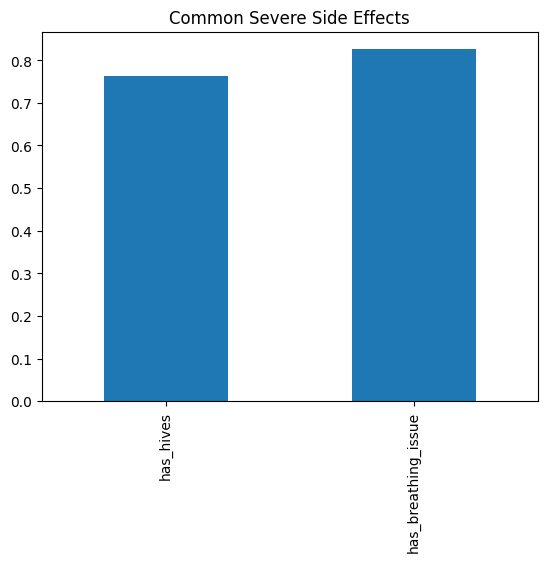

In [12]:
# Side Effect Severity Analysis
data['has_hives'] = data['side_effects'].str.contains('hives', case=False)
data['has_breathing_issue'] = data['side_effects'].str.contains('breathing', case=False)

data[['has_hives','has_breathing_issue']].mean().plot(kind='bar')
plt.title("Common Severe Side Effects")
plt.show()

In [14]:
# Encoding for ML
le = LabelEncoder()

cols = ['generic_name','medical_condition','drug_classes','rx_otc','pregnancy_category','csa']
for col in cols:
    data[col] = le.fit_transform(data[col])

In [15]:
# ML Model – Drug Rating Prediction
X = data[['generic_name','medical_condition','no_of_reviews','risk_score']]
y = data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))
print("R2 Score:", r2_score(y_test, pred))

MAE: 0.7657304710527028
R2 Score: 0.8435452004004039


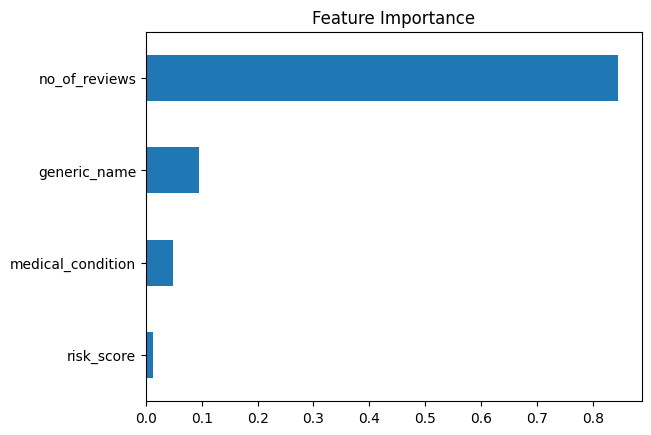

In [16]:
# Feature Importance
importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values().plot(kind='barh', title="Feature Importance")
plt.show()


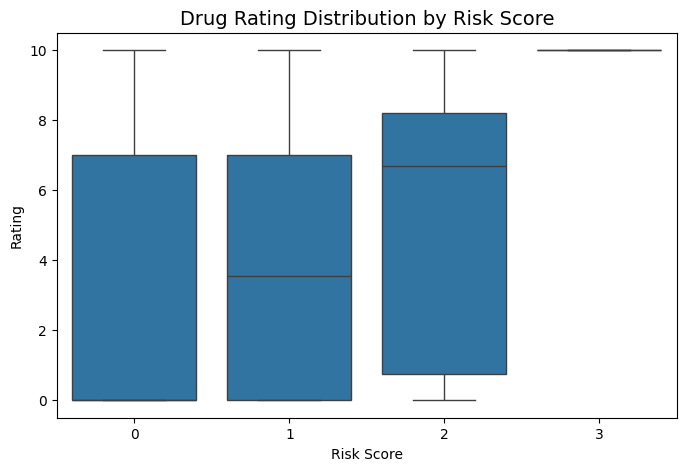

In [17]:
# Rating vs Risk Score
# Shows how drug risk impacts user ratings
plt.figure(figsize=(8,5))
sns.boxplot(x='risk_score', y='rating', data=data)
plt.title("Drug Rating Distribution by Risk Score", fontsize=14)
plt.xlabel("Risk Score")
plt.ylabel("Rating")
plt.show()

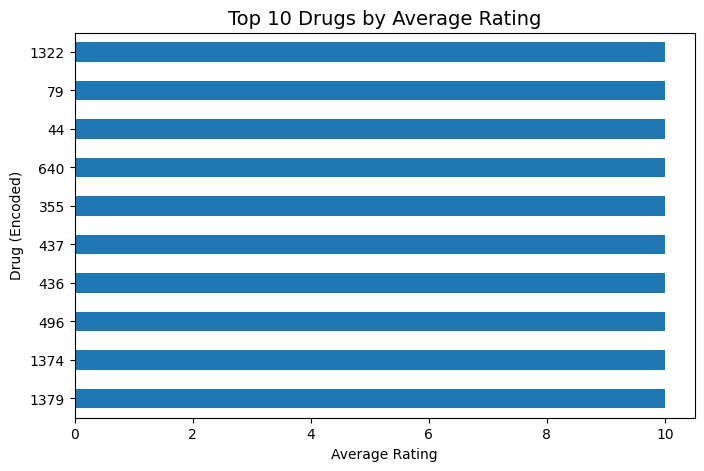

In [18]:
# Top 10 Drugs by Average Rating
# Identifies most trusted drugs
top_drugs = data.groupby('generic_name')['rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
top_drugs.plot(kind='barh')
plt.title("Top 10 Drugs by Average Rating", fontsize=14)
plt.xlabel("Average Rating")
plt.ylabel("Drug (Encoded)")
plt.show()

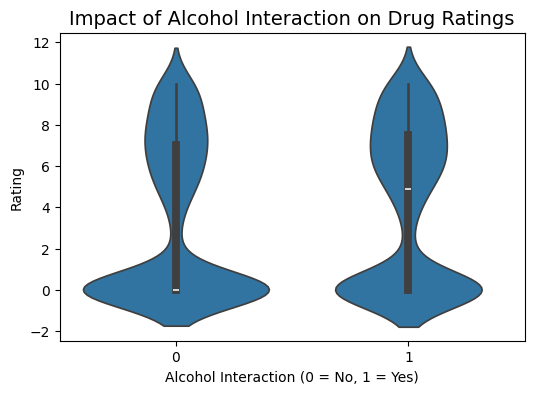

In [19]:
# Alcohol Interaction Impact on Ratings
# Healthcare safety visualization
plt.figure(figsize=(6,4))
sns.violinplot(x='alcohol', y='rating', data=data)
plt.title("Impact of Alcohol Interaction on Drug Ratings", fontsize=14)
plt.xlabel("Alcohol Interaction (0 = No, 1 = Yes)")
plt.ylabel("Rating")
plt.show()

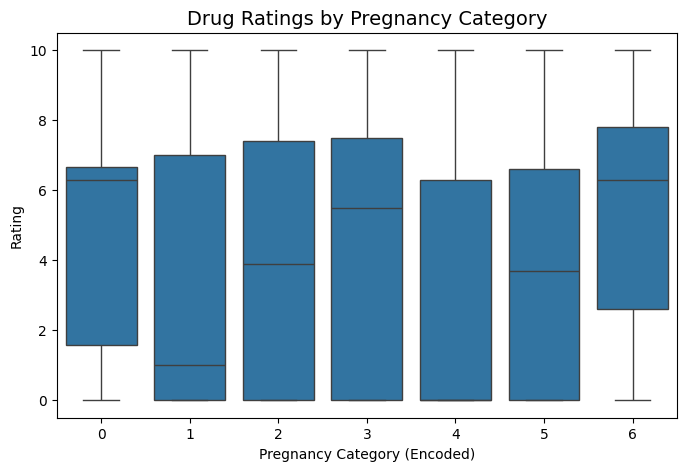

In [20]:
# Pregnancy Category vs Rating
# Regulatory + healthcare analysis
plt.figure(figsize=(8,5))
sns.boxplot(x='pregnancy_category', y='rating', data=data)
plt.title("Drug Ratings by Pregnancy Category", fontsize=14)
plt.xlabel("Pregnancy Category (Encoded)")
plt.ylabel("Rating")
plt.show()

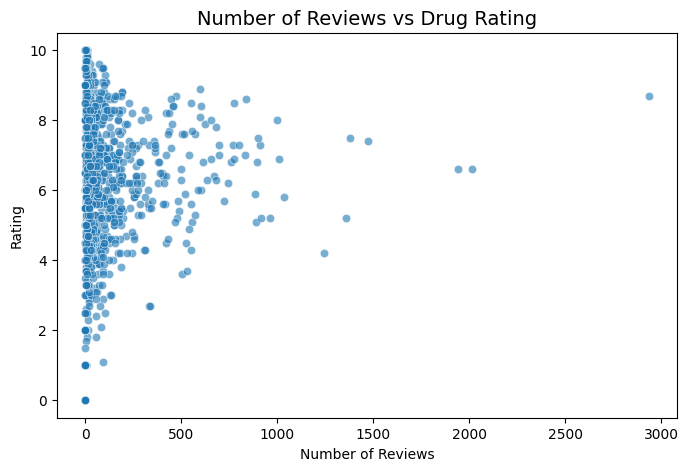

In [21]:
# Review Count vs Rating (Popularity vs Quality)
# Very professional scatter plot
plt.figure(figsize=(8,5))
sns.scatterplot(x='no_of_reviews', y='rating', data=data, alpha=0.6)
plt.title("Number of Reviews vs Drug Rating", fontsize=14)
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.show()

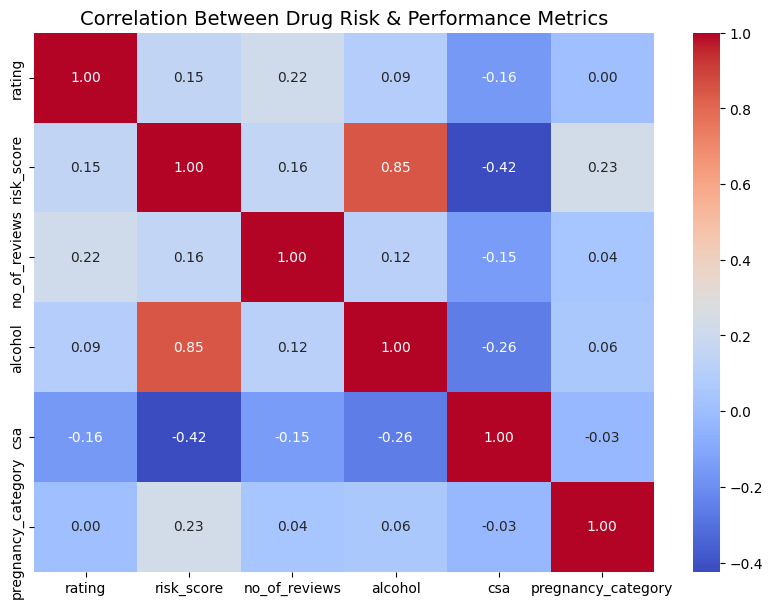

In [22]:
# Correlation Heatmap (Clean Version)
# Final summary visualization
plt.figure(figsize=(10,7))
sns.heatmap(
    data[['rating','risk_score','no_of_reviews','alcohol','csa','pregnancy_category']].corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Between Drug Risk & Performance Metrics", fontsize=14)
plt.show()